**ASSIGNMENT 1 - EMPIRICAL STUDY OF KNAPSACK PROBLEM**

**1. Group Description**

- Group Number: 111
- Member 1
  - Student Name: Meet Mehta
  - Student Number: 300261159
- Member 2
  - Student Name: Rakshita Mathur
  - Student Number: 300215340


**2. Knapsack Problem**

The Knapsack Problem is a classic optimization problem where you must select a subset of items, each with a weight and value, to maximize the total value while not exceeding a given weight capacity. In thisAssignment we will be exploring the same with following approches:
1. `Generate and Test`: Try all possible combinations of items and choose the one with the maximum value without exceeding the capacity.
2. `Greedy Algorithm`:
   Select items based on their value-to-weight ratio, adding the highest ratio items until the capacity is reached.
3. `Simulated Annealing`:
   Use a probabilistic approach to iteratively explore and accept worse solutions with decreasing probability, eventually converging towards an optimal solution.
4. `Genetic Algorithm`:
   Represent solutions as individuals in a population, apply selection, crossover, and mutation operations to evolve better solutions over generations.

**3. Dataset**

The dataset provided here is related to the Knapsack Problem. It consists of several instances, each with the following components:

1. `Weights`: An array of weights representing the weights of individual items.
2. `Prices`: An array of prices or values corresponding to the value of each item.
3. `Capacity`: The weight capacity or maximum weight that the knapsack can hold.
4. `Best Picks`: An array of binary values (0s and 1s) indicating which items are selected (1) or not selected (0) as the optimal solution for the given instance.
5. `Best Price`: The total value or price of the selected items in the optimal solution.

Each row in the dataset likely represents a different Knapsack Problem instance with varying weights, values, and capacities, and the "Best Picks" and "Best Price" columns provide the optimal solution for each instance.

[`Dataset`](https://www.kaggle.com/datasets/warcoder/knapsack-problem)

**Import important libraries**

In [ ]:
import pandas as pd
import itertools
import numpy as np

**Read Dataset**



In [ ]:
# importing the dataset

url = "https://raw.githubusercontent.com/rakshita003/Datasets/main/Kanpsack.csv"

dataset = pd.read_csv(url)

In [ ]:
# looking at the columns of the Dataset

dataset.columns

Index(['Weights', 'Prices', 'Capacity', 'Best picks', 'Best price'], dtype='object')

In [ ]:
# looking at the first 10 rows of the dataset

dataset.head(10)

,Weights,Prices,Capacity,Best picks,Best price
0,[46 40 42 38 10],[12 19 19 15 8],40,[0. 1. 0. 0. 0.],19.0
1,[11 31 4 6 7],[ 2 8 18 16 3],64,[1. 1. 1. 1. 1.],47.0
2,[32 49 27 37 24],[19 16 16 4 1],87,[1. 0. 1. 0. 1.],36.0
3,[20 35 22 23 16],[19 17 19 9 1],21,[1. 0. 0. 0. 0.],19.0
4,[ 7 12 19 13 20],[10 11 18 15 5],50,[0. 1. 1. 1. 0.],44.0
5,[27 10 25 25 7],[13 19 7 16 3],66,[1. 1. 0. 1. 0.],48.0
6,[21 2 33 45 26],[ 1 14 10 6 13],80,[0. 1. 1. 0. 1.],37.0
7,[37 27 39 14 25],[18 7 15 4 13],35,[0. 0. 0. 0. 1.],13.0
8,[ 1 48 4 23 39],[ 9 4 10 16 12],51,[1. 0. 1. 1. 0.],35.0
9,[ 4 3 22 9 32],[14 6 3 17 8],53,[1. 1. 0. 1. 1.],45.0


**Preprocessing Step**

Typically, the initial step in any project that involves reading and handling data is data preprocessing and cleansing.

In our dataset, we expect the entries in the "Weights," "Prices," and "Best Picks" columns to be in the form of arrays of floats or integers, like this: [45, 40, 42, 38, 10]

However, when you read each entry using pandas, they will be in a form of a string: "[45 40 42 38 10]"

So we need to convert these strings into "arrays of floats or integers." You can utilize the function provided below for this purpose:


In [ ]:
def string_to_list(string):
    # Check if the input is already a list
    if isinstance(string, list):
        return string

    # Assuming the input is a string representation of a list, strip brackets and split by comma
    string_list = string.strip('[]').split(',')

    # Convert each element to a float
    float_list = []
    for element in string_list:
        # Split by space and convert each part to float
        sub_elements = element.split()
        sub_floats = [float(sub_element) for sub_element in sub_elements]
        float_list.extend(sub_floats)

    return float_list


Furthermore, it's possible that certain rows in the dataset contain empty values in specific columns. We also aim to eliminate these rows as they do not provide any useful information. We use dropna() function to do so:

In [ ]:
#Ignore the warning messages.

dataset = dataset.dropna()

dataset.Weights = dataset.Weights.apply(lambda x : string_to_list(x))
dataset.Prices = dataset.Prices.apply(lambda x : string_to_list(x))
dataset['Best picks'] = dataset['Best picks'].apply(lambda x : string_to_list(x))

<ipython-input-6-833fb421dc49>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Weights = dataset.Weights.apply(lambda x : string_to_list(x))
<ipython-input-6-833fb421dc49>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Prices = dataset.Prices.apply(lambda x : string_to_list(x))
<ipython-input-6-833fb421dc49>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [ ]:
# looking at the modified Dataset
dataset.head()

,Weights,Prices,Capacity,Best picks,Best price
0,"[46.0, 40.0, 42.0, 38.0, 10.0]","[12.0, 19.0, 19.0, 15.0, 8.0]",40,"[0.0, 1.0, 0.0, 0.0, 0.0]",19.0
1,"[11.0, 31.0, 4.0, 6.0, 7.0]","[2.0, 8.0, 18.0, 16.0, 3.0]",64,"[1.0, 1.0, 1.0, 1.0, 1.0]",47.0
2,"[32.0, 49.0, 27.0, 37.0, 24.0]","[19.0, 16.0, 16.0, 4.0, 1.0]",87,"[1.0, 0.0, 1.0, 0.0, 1.0]",36.0
3,"[20.0, 35.0, 22.0, 23.0, 16.0]","[19.0, 17.0, 19.0, 9.0, 1.0]",21,"[1.0, 0.0, 0.0, 0.0, 0.0]",19.0
4,"[7.0, 12.0, 19.0, 13.0, 20.0]","[10.0, 11.0, 18.0, 15.0, 5.0]",50,"[0.0, 1.0, 1.0, 1.0, 0.0]",44.0


**4. Generate and Test**

The `gen_and_test` function implements a brute-force approach to solve the Knapsack problem.

- It starts by extracting the weights, prices, and knapsack capacity from the input data.
- The function iterates through all possible combinations of items, represented as binary strings.
- For each combination, it calculates the total weight and total price of the selected items by examining each bit in the binary representation and including the corresponding item if the bit is 1.
- It checks if the total weight of the selected items does not exceed the knapsack capacity. If this condition is met and the total price of the current combination is greater than the best total price found so far, it updates the best total price and the list of best selected items price.
- Finally, it returns the best total price and the list of items that should be included in the knapsack to achieve this maximum total price.

In [ ]:
def gen_and_test(data):
    # Extracting the necessary data from the input 'data' dictionary
    weights = data['Weights']    # List of item weights
    prices = data['Prices']      # List of item prices
    knapsack_capacity = data['Capacity']  # Knapsack capacity
    n = len(weights)  # Number of items
    best_solution_price = 0  # Initialize the best total price
    best_solution = []  # Initialize the list of best selected items

    # Generate all possible combinations of items
    for i in range(2 ** n):
        selected_items = []  # Initialize the list of items in the current combination
        total_weight = 0  # Initialize the total weight of the current combination
        total_price = 0   # Initialize the total price of the current combination

        # Convert the integer i to its binary representation with 'n' digits (0-padded)
        bin_str = bin(i)[2:].zfill(n)

        # Check each item and add it to the knapsack if its corresponding bit is 1
        for j in range(n):
            if bin_str[j] == '1':
                item_weight = weights[j]  # Get the weight of the j-th item
                item_price = prices[j]    # Get the price of the j-th item
                selected_items.append((item_weight, item_price))  # Add the item to the selected items list
                total_weight += item_weight
                total_price += item_price

        # Check if this combination is better than the previous best
        if total_weight <= knapsack_capacity and total_price > best_solution_price:
            best_solution_price = total_price
            best_solution = selected_items

    return best_solution_price, best_solution


In [ ]:
solutions = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = gen_and_test(row)
    solutions.append(1 if target == solution else 0)


In [ ]:
accuracy = np.mean(solutions)
print('Accuracy of best prices found is', accuracy)

Accuracy of best prices found is 1.0


**Our Analysis:**

The brute-force algorithm, while guaranteeing correctness, exhibits significant limitations. Its exponential time complexity **O(2^n*n)** renders it impractical for real-world scenarios with a large number of items. For practical applications, the trade-off between accuracy and computational resources becomes evident, prompting the exploration of more efficient algorithms which we will see next in this assignment. In conclusion, the brute-force approach is valuable for understanding the problem and ensuring correctness, but its impracticality for large instances necessitates the adoption of more optimized algorithms in practice.

------------------------------------------------------------------------------------------------

**5. Greedy Search**


The `greedy` function provides a solution to the 0/1 Knapsack problem using a greedy approach:

1. **Data Extraction**: The function starts by extracting essential data from the input dictionary. This includes lists of item weights, item prices, and the knapsack's capacity.

2.  **Value-to-Weight Ratios**: It calculates the value-to-weight ratio for each item. This ratio represents how much value (price) you get for each unit of weight, which is a key factor in the greedy strategy.

3.  **Sorting**: The function creates a list of item indices and sorts them based on their value-to-weight ratios in descending order. Sorting by the highest ratio first is a fundamental aspect of the greedy approach. This prioritizes items that provide the most value for their weight.

4.  **Greedy Selection**: The core of the algorithm lies in the subsequent loop over the sorted indices. For each item:
    - It checks whether adding the item to the current solution would exceed the knapsack's capacity. If the addition does not exceed the capacity, the item is included in the current solution.
    - The current capacity of the knapsack is updated to reflect the added item's weight.
    - The total price of the current solution is updated to reflect the added item's price.
    - The algorithm continues to consider items in descending order of value-to-weight ratio until the knapsack is full.

5.  **Binary Solution Representation**: To represent the final solution, a binary list is created. Each element corresponds to an item, with a value of 1 indicating that the item is selected and 0 indicating that it is not.






In [ ]:
def greedy(data):
    # Extracting the necessary data from the input 'data' dictionary
    weights = data['Weights']    # List of item weights
    prices = data['Prices']      # List of item prices
    knapsack_capacity = data['Capacity']  # Knapsack capacity
    n = len(weights)  # Number of items
    best_solution_price = 0  # Initialize the best total price
    best_solution = []  # Initialize the list of best selected items

    # Calculate the value-to-weight ratios for all items.
    value_per_weight = [price / weight for price, weight in zip(prices, weights)]

    # Create a list of item indices sorted by value-to-weight ratio in descending order.
    sorted_indices = sorted(range(n), key=lambda i: value_per_weight[i], reverse=True)

    current_capacity = 0  # Initialize the current capacity of the knapsack
    current_solution = []  # Initialize the list of items in the current solution

    for i in sorted_indices:
        if current_capacity + weights[i] <= knapsack_capacity:
            current_solution.append(i)  # Add the item to the current solution
            current_capacity += weights[i]  # Update the current capacity
            best_solution_price += prices[i]  # Update the best total price

    # Create a binary list representing the best solution with 1s indicating selected items.
    best_solution = [1 if i in current_solution else 0 for i in range(n)]

    return best_solution_price, best_solution



In [ ]:
solutions_greedy = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = greedy(row)
    solutions_greedy.append(1 if target == solution else 0)

In [ ]:
accuracy_greedy = np.mean(solutions_greedy)
print("Greedy Accuracy is", accuracy_greedy)

Greedy Accuracy is 0.8341937443061038


**Our Analysis:**

The Greedy Algorithm for the Knapsack Problem efficiently approximates solutions while avoiding the exponential time complexity of brute force. By prioritizing high-value-to-weight ratio items, it often provides satisfactory results, especially when there's a clear distinction between item values. Its key strength is efficiency **O(n * log(n))**, making it practical for large problem instances. Although it doesn't guarantee optimality due to its local decision-making, the Greedy Algorithm offers a valuable compromise between solution quality and computational feasibility. It's widely used in real-world scenarios like resource allocation, where quick decisions matter and exhaustive methods are impractical, making it a practical choice for various applications.

------------------------------------------------------------------------------------------------

**6. Simulated Annealing**

1. **Initialization**: The code initializes several variables:
   - `n`: The number of items in the knapsack.
   - `current_solution`: The current solution to the knapsack problem, initially obtained using a greedy algorithm.
   - `best_solution`: The best solution found so far (set to current solution).
   - `best_solution_price`: The total value of the best solution found so far (set to 0).
  - `current_temperature`: The initial temperature for the simulated annealing algorithm using the greedy algorithm.

2. **Simulated Annealing Loop**: The core of the algorithm is a loop that runs for N iterations. In each iteration:
 - A neighboring solution is generated by flipping the status (0 or 1) of a random item in the knapsack.
 - The change in total value (delta) between the current solution and the neighbor solution is calculated.
 - If the neighbor solution is better (higher value) or is accepted probabilistically based on the temperature, and it does not exceed the knapsack's capacity, it becomes the new current solution.
 - If the current solution has a higher total value than the best solution found so far, it updates the best solution and best solution price.
 - The temperature is reduced by a factor of cooling_rate in each iteration, which is a key aspect of simulated annealing.

3.	**Result** : Finally, the function returns the best_solution_price (the total value of the best solution) and best_solution (the binary representation of items in the best solution).

In [ ]:
import random
import math

def simulated_annealing(data,N, initial_temperature, cooling_rate):
    weights = data['Weights']    # List of item weights
    prices = data['Prices']      # List of item prices
    cap = data['Capacity']      # Capacity of the Knapsack
    n = len(weights)

  # Initialize the current solution and best solution
    _, indexes = greedy(data)
    current_solution = indexes
    best_solution = current_solution
    best_solution_price = 0

    current_temperature = initial_temperature

    for iteration in range(N):
        # Generate a neighboring solution by flipping a random item status in the knapsack
        neighbor_solution = current_solution.copy()
        rand_index = random.randint(0, n - 1)
        neighbor_solution[rand_index] = 1 - neighbor_solution[rand_index]

        # Calculate the change in total value
        current_value = sum(prices[i] * current_solution[i] for i in range(n))
        neighbor_value = sum(prices[i] * neighbor_solution[i] for i in range(n))
        neighbor_weight = sum(weights[i] * neighbor_solution[i] for i in range(n))
        delta = neighbor_value - current_value

        # If the difference is greater than 0, meaning if the neighbor combination is better than the original combination and is under the capacity, we accept the result
        if (delta > 0 or random.random() < math.exp(delta / current_temperature)) and (neighbor_weight <= cap):
            current_solution = neighbor_solution

        # Update the best solution if the sum of the price of current_solution is better than best_solution_price
        if sum(prices[i] * current_solution[i] for i in range(n)) > best_solution_price:
            #assigning the best_solution
            best_solution = current_solution.copy()

            #getting the value of the best_solution_price from the best_solution
            best_solution_price = sum(prices[i] * current_solution[i] for i in range(n))

        # Reduce the temperature
        current_temperature *= cooling_rate

    return best_solution_price, best_solution


In [ ]:

solutions_sa = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = simulated_annealing(row, N = 100, initial_temperature=30, cooling_rate=0.99)
    solutions_sa.append(1 if target == solution else 0)



In [ ]:
accuracy_sa = np.mean(solutions_sa)
print("Simulated Annealing Accuracy is", accuracy_sa)

Simulated Annealing Accuracy is 0.9789452373722036


**Our Analysis:**

Simulated Annealing is a versatile optimization algorithm utilized to find approximate solutions to complex problems like the Knapsack Problem. It starts with an initial solution and iteratively explores neighboring solutions, using a temperature parameter and cooling rate to probabilistically accept worse solutions. This property helps it escape local optima. Simulated Annealing doesn't guarantee optimal solutions but rather good approximations, making it suitable for problems where exhaustive search is impractical. However, its effectiveness depends on parameter tuning, and the algorithm's time complexity increases with the number of iterations. The generic time complexity of the algorithm is **O(N) to O(N^2)**.


------------------------------------------------------------------------------------------------

**7. Genetic Algorithm**

The Genetic Algorithm for the 0/1 Knapsack Problem:

1. **Initialization**: Start by creating a population of potential solutions, where each solution represents a combination of items (0 for exclusion, 1 for inclusion) in the knapsack.

2. **Fitness Calculation**: Calculate the fitness for each solution in the population, representing the total value of selected items. If the weight exceeds the knapsack's limit, set the fitness to 0.

3. **Selection**: Choose parents for the next generation using tournament selection, repeatedly selecting the fittest individuals as parents.

4. **Crossover (Recombination)**: Pair selected parents and perform crossover with a given probability. This involves exchanging genes (item selections) between parents to generate new child solutions.

5. **Mutation**: Apply mutation to child solutions with a certain probability, introducing random changes in item selections to diversify the population.

6. **Update Population**: Combine parents and children to form a new population, replacing the previous one.

7. **Termination**: Repeat steps 3 to 6 for a specified number of generations (num_generations) until the algorithm reaches termination.

8. **Best Solution Tracking**: Keep track of the best solution (highest fitness) found during the algorithm's execution.

9. **Final Result**: When the algorithm concludes, return the best total value achieved by the genetic algorithm and a binary list representing the selected items in the knapsack.

The Genetic Algorithm evolves candidate solutions over generations, selecting parents based on fitness, applying crossover and mutation, and tracking the best solution. Its goal is to find an optimal or near-optimal solution to the 0/1 Knapsack Problem.



In [ ]:
import random

# Function to calculate the fitness of an individual (total price of selected items)
def calculate_fitness(ind, prices, weights, capacity):
    total_price = 0
    total_weight = 0
    for i in range(len(ind)):
        if ind[i] == 1:
            total_price += prices[i]
            total_weight += weights[i]
    # If total weight exceeds the capacity, return 0 fitness
    if total_weight > capacity:
        return 0
    else:
        return total_price

# Function to perform crossover between two parents
def crossover(parent1, parent2, cross_rate):
    child1 = parent1[:]  # Create a copy of the first parent
    child2 = parent2[:]  # Create a copy of the second parent
    for i in range(len(parent1)):
        # With probability 'cross_rate', swap the values between parents
        if random.random() < cross_rate:
            child1[i], child2[i] = child2[i], child1[i]
    return child1, child2

# Function to perform mutation on an individual
def mutation(child, mut_rate):
    for i in range(len(child)):
        # With probability 'mut_rate', flip the value (0 to 1 or 1 to 0)
        if random.random() < mut_rate:
            child[i] = 1 - child[i]
    return child

# Genetic algorithm function
def genetic_algorithm(data, population_size, num_generations, mut_rate, cross_rate, tournament_size):
    weights = data['Weights']  # List of item weights
    prices = data['Prices']    # List of item prices
    capacity = data['Capacity']  # Knapsack capacity

    population = []
    for _ in range(population_size):
        # Initialize the population with random individuals
        individual = [random.randint(0, 1) for _ in range(len(prices))]
        population.append(individual)

    # Initialize variables to keep track of the best solution
    best_solution_price = 0
    best_solution = [0] * len(prices)

    for generation in range(num_generations):
        # Select parents using tournament selection
        parents = []
        for _ in range(population_size):
            # Randomly sample individuals for the tournament
            tournament = random.sample(population, tournament_size)
            tournament_fitness = [calculate_fitness(ind, prices, weights, capacity) for ind in tournament]
            # Select the parent with the highest fitness from the tournament
            selected_parent = tournament[tournament_fitness.index(max(tournament_fitness))]
            parents.append(selected_parent)

        # Create a new population through crossover and mutation
        new_population = []
        for i in range(0, population_size, 2):
            parent1, parent2 = parents[i], parents[i + 1]
            child1, child2 = crossover(parent1, parent2, cross_rate)
            child1 = mutation(child1, mut_rate)
            child2 = mutation(child2, mut_rate)
            new_population.extend([child1, child2])

        population = new_population

        # Update the best solution if necessary
        for individual in population:
            individual_price = calculate_fitness(individual, prices, weights, capacity)
            if individual_price > best_solution_price:
                best_solution_price = individual_price
                best_solution = individual

    # Return the best solution price and the best solution itself
    return best_solution_price, best_solution


In [ ]:
solutions_ga = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 50, num_generations = 50, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5)
    solutions_ga.append(1 if target == solution else 0)

In [ ]:
accuracy_ga = np.mean(solutions_ga)
print("Genetic Algorithm Accuracy is",accuracy_ga )

Genetic Algorithm Accuracy is 0.9992914262577184


**Our Analysis:**

The Genetic Algorithm for the Knapsack Problem is a versatile heuristic optimization technique that efficiently approximates solutions while avoiding the exponential time complexity of exhaustive search methods. By iteratively evolving a population of candidate solutions, it explores a broad solution space and often provides satisfactory results. Its key strength is its ability to handle complex, combinatorial optimization problems efficiently, typically with a time complexity of **O(num_generations * population_size * num_items)**, making it practical for large problem instances.

While the Genetic Algorithm does not guarantee finding the global optimum due to its stochastic nature, it offers a valuable compromise between solution quality and computational feasibility. It excels in balancing exploration and exploitation of the solution space, making it suitable for a wide range of real-world applications, including resource allocation, feature selection, circuit design, and more. In scenarios where quick decisions are essential and exhaustive methods are impractical, the Genetic Algorithm emerges as a practical choice, capable of finding near-optimal solutions in complex optimization problems.

------------------------------------------------------------------------------------------------

**8. Comparative Study**

**Description**

The purpose of this comparative study is to evaluate and compare the performance of different algorithms for solving the Knapsack problem. Four algorithms were selected for this study: Brute Force, Greedy Algorithm, Simulated Annealing and Genetic Algorithm.





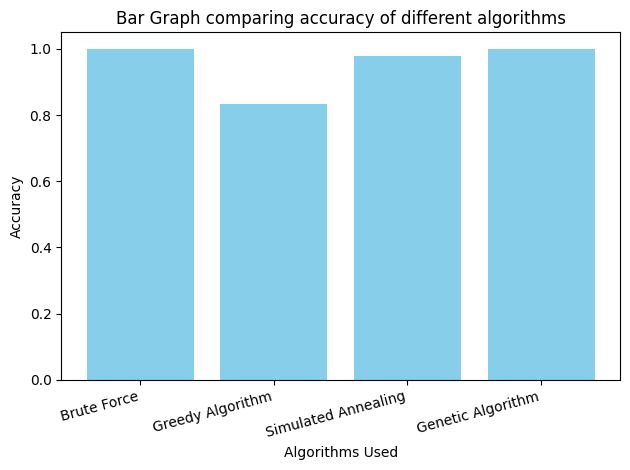

In [ ]:
import matplotlib.pyplot as plt

values = [accuracy, accuracy_greedy, accuracy_sa, accuracy_ga]
variables = ['Brute Force', 'Greedy Algorithm', 'Simulated Annealing', 'Genetic Algorithm']

plt.bar(variables, values, color='skyblue')

plt.xlabel('Algorithms Used')
plt.ylabel('Accuracy')
plt.title('Bar Graph comparing accuracy of different algorithms')

plt.xticks(rotation=15, ha="right")

plt.tight_layout()

plt.show()


**Discussion**

In this comparative study, we evaluated the performance of three algorithms (Brute Force, Greedy Algorithm, Simulated Annealing and Genetic Algorithm) for solving the Knapsack problem. The figure presented above provide insights into accuracy of each algorithm under different scenarios.

Key findings and observations include:

- Brute Force provides optimal solutions but is computationally expensive, especially for large problem instances.
- The Greedy Algorithm provides reasonably good solutions quickly but may not always yield optimal results.
- Simulated Annealing uses the greedy algorthim to compute the results and tries to explore other (random) nodes (possibly worse results based on input parameters) based on probability.
- Genetic Algorithm strikes a balance between solution quality and execution time, with performance influenced by parameter settings.



---



**9. Conclusion**

In this empirical study, we conducted a comparative analysis of four different algorithms for solving the Knapsack problem: Brute Force, Greedy Algorithm, Simulated Annealing, and Genetic Algorithm. Our primary objective was to evaluate the performance of these algorithms in terms of accuracy, which is a critical metric when solving real-world optimization problems.

**Empirical Study Results**

- **Accuracy**: Brute Force consistently provided accurate, optimal solutions. This reliability makes it an excellent choice for scenarios where precision is paramount but computational resources are not a limiting factor. The Greedy Algorithm and Simulated Annealing, while offering faster solutions, sometimes sacrificed accuracy due to their heuristic nature. The Genetic Algorithm, known for its robustness, delivered competitive accuracy levels, especially in medium-sized problem instances.

**Ideas for Future Work**

Future work in the context of solving the Knapsack problem and related combinatorial optimization challenges can explore the following avenues:

1. **Hybrid Algorithms**: Investigate the potential of hybrid algorithms that combine the strengths of multiple algorithms, leveraging accuracy and efficiency simultaneously.

2. **Parallel Processing**: Implement advanced parallel processing techniques to further enhance the scalability of algorithms, enabling them to tackle even larger problem instances without compromising accuracy.

3. **Machine Learning Integration**: Explore the integration of machine learning techniques, such as reinforcement learning and neural networks, to create adaptive algorithms that can continually improve their accuracy over time.

In conclusion, our empirical study provided valuable insights into the trade-offs between accuracy and efficiency among different algorithms for solving the Knapsack problem. The choice of algorithm should be made based on the specific problem requirements, considering factors like problem size, precision needs, and available computational resources. Future research can build upon these findings to develop cutting-edge optimization solutions that address real-world challenges with a focus on both accuracy and efficiency.

--------------------------------------------------------------------------


**10. References**


1. [How to solve the Knapsack Problem with dynamic programming](https://medium.com/@fabianterh/how-to-solve-the-knapsack-problem-with-dynamic-programming-eb88c706d3cf)
2. [0/1 Knapsack Problem](https://www.geeksforgeeks.org/0-1-knapsack-problem-dp-10/)
3. [Knapsack problem](https://en.wikipedia.org/wiki/Knapsack_problem)
4. [Knapsack Problem - Greedy Method](https://www.youtube.com/watch?v=oTTzNMHM05I&ab_channel=AbdulBari)
5. [Genetically solving the age old Knapsack Problem](https://arpitbhayani.me/blogs/genetic-knapsack/)
6. [Simulated Annealing And The Knapsack Problem](https://web.karabuk.edu.tr/emrullahsonuc/papers/A_Parallel_Approach_for_Solving_01_Knapsack_Problem_using_Simulated_Annealing_Algorithm_on_CUDA_Platform.pdf)
